# FENS POSTER PLOTS 2024

Data:
- 30 surgeries
- age: 0.5 - 68, mean 38
- hours incubation: 16 - 25
- Rs < 40 
- resting_potential: [-45, -90]
- membra_time_constant_tau > -25
- capacitance: [10, 900]


## ToC

In [2]:
# loading libraries
import ephys_analysis.funcs_plot_intrinsic_props as pl_intr
import pandas as pd
import matplotlib.pyplot as plt 
import datetime
import numpy as np
from importlib import reload
from ephys_analysis.funcs_human_characterisation import load_traces
from ephys_analysis.stimulation_windows_ms import stim_window_con_screen
import neo
import ephys_analysis.funcs_sorting as sort
import ephys_analysis.funcs_human_characterisation as hcf
#import os

# functions
def get_plot_dfs(df, OPs_exclude_15mM):
    '''
    based on the list of OPs where 15 mM KCl was used 
    '''

    for OP in OPs_exclude_15mM:
        df = df.drop(df.index[(df['OP'] == OP) & (df['treatment'] == 'high K')])
        df = df[(df['treatment'] != 'TTX') & (df['treatment'] != 'wash in high K')]
    df.reset_index(inplace = True, drop = True)  
    
    return df

/Users/verjim/laptop_D_17.01.2022/Schmitz_lab/code/Human-slice-scripts/src/ephys_analysis/detect_peaks.py:11: UserWarning: A newest version is available at https://pypi.org/project/detecta/
  warnings.warn('A newest version is available at https://pypi.org/project/detecta/')


In [2]:
# loading data
data_dir = '/Users/verjim/laptop_D_17.01.2022/Schmitz_lab/results/human/data/summary_data_tables/FENS_poster/'

# slice
df_intr_slice_all = pd.read_csv(data_dir + 'all_ages_slice_comparison.csv')
df_spontan_slice = pd.read_csv(data_dir + 'all_age_spontan_slice.csv')
df_connect_slice = pd.read_csv(data_dir + 'slice_all_age_connections_IC.csv')

# repatch
df_intr_repatch = pd.read_csv(data_dir + 'all_repatch.csv')
df_spontan_repatch = pd.read_csv(data_dir + 'all_age_spontan_repatch.csv')
df_connect_repatch = pd.read_csv(data_dir + 'repatch_all_age_connections_IC.csv')

In [3]:
OPs_exclude_15mM = df_intr_slice_all.OP[df_intr_slice_all['high K concentration'] == '15 mM'].unique()

# remove data not used for poster
df_intr_slice = get_plot_dfs(df_intr_slice_all, OPs_exclude_15mM)
df_spontan_slice = get_plot_dfs(df_spontan_slice, OPs_exclude_15mM)
df_connect_slice = get_plot_dfs(df_connect_slice, OPs_exclude_15mM)

df_intr_repatch = get_plot_dfs(df_intr_repatch, OPs_exclude_15mM)
df_spontan_repatch = get_plot_dfs(df_spontan_repatch, OPs_exclude_15mM)
df_connect_repatch = get_plot_dfs(df_connect_repatch, OPs_exclude_15mM)

In [4]:
len(df_intr_slice) + len(df_intr_repatch)

485

In [4]:
# # saving the df used for plotting for stats

# df_intr_slice = df_intr_slice.copy(deep = True)
# df_spontan_slice = df_spontan_slice.copy(deep = True)
# df_connect_slice = df_connect_slice.copy(deep = True)

# df_intr_slice.to_csv(data_dir + 'slice_intr_stats.csv')
# df_spontan_slice.to_csv(data_dir + 'slice_spontan_stats.csv')
# df_connect_slice.to_csv(data_dir + 'slice_con_stats.csv')

# df_intr_repatch = df_intr_repatch.copy(deep = True)
# df_spontan_repatch = df_spontan_repatch.copy(deep = True)
# df_connect_repatch = df_connect_repatch.copy(deep = True)

# df_intr_repatch.to_csv(data_dir + 'repatch_intr_stats.csv')
# df_spontan_repatch.to_csv(data_dir + 'repatch_spontan_stats.csv')
# df_connect_repatch.to_csv(data_dir + 'repatch_con_stats.csv')



In [5]:
# df1 = df_connect_slice.copy(deep=True) 
# df2 = df_connect_repatch.copy(deep=True) 
# df1.to_csv(data_dir + 'slice_all_age_connections_IC.csv')
# df2.to_csv(data_dir + 'repatch_all_age_connections_IC.csv')

# # df1 = pd.read_excel(data_dir + 'slice_all_age_connections_IC.xlsx')
# # df1.to_csv(data_dir + 'slice_all_age_connections_IC.csv')
# # df2 = pd.read_excel(data_dir + 'repatch_all_age_connections_IC.xlsx')
# # df2.to_csv(data_dir + 'repatch_all_age_connections_IC.csv')

In [6]:
# common plot parameters
reload(pl_intr)

treatments = ['Ctrl', 'high K']
titles_dict_all = pl_intr.dict_for_plotting()


params_of_need = ['Rin', 'resting_potential', 'AP_halfwidth', 'TH', 'membra_time_constant_tau']
titles_dict = {}
for ki in titles_dict_all.keys():
    if ki in params_of_need:
        titles_dict[ki] = titles_dict_all[ki]
titles_dict_spontan = pl_intr.dict_for_plotting_synaptic()

titles_dict_con = {'Amp.1': ['EPSP amplitude', 'mV', [0, 0.5, 1, 1.5, 2]]}
titles_dict_con_slice = {'Amp.1': ['EPSP amplitude', 'mV', [0, 1, 2, 3, 4, 5]]}


colors = ['gold', 'orange', 'gold', 'mediumseagreen']

fig_x = 11
fig_y = 8

x_labels =  ['D1','D2 \n after aCSF', 'D1', 'D2 \n after high K']
scatter_dot_size = 190
scatter_alpha = 0.8
ticks_and_text_size = 22

save_dir = '/Users/verjim/laptop_D_17.01.2022/Schmitz_lab/results/human/plots/FENS_poster/'

## Intrinsic properties

In [8]:
# slice

df = df_intr_slice
data_type = 'slice'

for u, param in enumerate(titles_dict.keys()): 
    if param == 'AP_halfwidth':
        df = df[df['AP_halfwidth'] > 0]
    fig2 = plt.figure(figsize=(fig_x,fig_y))
    ax = plt.subplot(1,1,1)
    for i, tr in enumerate(treatments):
        for j, day in enumerate(['D1', 'D2']):
            print(day, tr)
            k = j + 2*i 
            df_plot = df[(df['treatment'] == tr) & (df['day'] == day)]
            median = df_plot[param].median()
            x = np.linspace(0.65+k, 1.35+k, len(df_plot))

            ax.boxplot(df_plot[param], positions = [k + 0.5], notch = True, patch_artist=True, boxprops=dict(facecolor=colors[k], alpha = 0.75),
            medianprops = dict(linewidth=2.3, color = 'k'))    
            ax.scatter(x, df_plot[param], c = colors[int(k)], s = scatter_dot_size, alpha = scatter_alpha)
            
            ax.scatter(1+k, median, color = 'k', marker = '_', s = 2000, zorder = 2)
            ax.text(0.85+k, (median + abs(.05*median)), str(round(median,2)), size = ticks_and_text_size)

#         ax.text(1 + 2*i, int(np.max(df[param])), tr, size = 17, c = colors[2*i+1])
#         ax.text(1.7 + 2*i, int(np.max(df[param])), 'n = ' + str(len(df_plot)), size = ticks_and_text_size, c = colors[2*i+1])

    ax.tick_params(axis='y', labelsize=22)
    ax.set_xticks(ticks = [0.7,1.7,2.7,3.7], labels = x_labels, size = ticks_and_text_size)

    #plt.title(titles_dict[param][0], fontsize = 19, x = 0.5, y = 1)
    ax.set_ylabel(titles_dict[param][1], size = ticks_and_text_size +2)
    ax.set_yticks(ticks = titles_dict[param][2])
    ax.tick_params(axis='y', labelsize = ticks_and_text_size)

    plt.subplots_adjust(hspace=0.35)
    fig2.patch.set_facecolor('white')
    fig2.tight_layout()

    date = str(datetime.date.today())
#     if param == 'membra_time_constant_tau': # because of 2 decimals after comma
    plt.savefig(save_dir + 'intr/' + data_type + '_' + date + '_' + param + '.pdf')
    plt.close(fig2)

D1 Ctrl
D2 Ctrl
D1 high K
D2 high K
D1 Ctrl
D2 Ctrl
D1 high K
D2 high K
D1 Ctrl
D2 Ctrl
D1 high K
D2 high K
D1 Ctrl
D2 Ctrl
D1 high K
D2 high K
D1 Ctrl
D2 Ctrl
D1 high K
D2 high K


In [9]:
df = df_intr_repatch
df = df.sort_values(['day', 'cell_ID'])

data_type = 'repatch'

for u, param in enumerate(titles_dict.keys()): 
    fig2 = plt.figure(figsize=(fig_x,fig_y))
    ax = plt.subplot(1,1,1)
    for i, tr in enumerate(treatments):
        x_plot =[]

        for j, day in enumerate(['D1', 'D2']):
            print(day, tr)
            k = j + 2*i 
            df_plot = df[(df['treatment'] == tr) & (df['day'] == day)]
            df_plot.reset_index(drop=True, inplace=True)
            median = df_plot[param].median()
            x = np.linspace(0.7+k, 1.3+k, len(df_plot))
            x_plot.append(x)       
            ax.scatter(x, df_plot[param], c = colors[int(k)], s = scatter_dot_size, zorder = 2, alpha = scatter_alpha)
            ax.scatter(1+k, median, color = 'k', marker = '_', s = 2000, zorder = 2)
            ax.text(0.85+k, (median + abs(.05*median)), str(round(median,2)), size = ticks_and_text_size)
            x_plot.append(x)
            if k in [1,3]:
                for c, cell in enumerate(df_plot['cell_ID_new']):
                    x1 = [x_plot[0][c], x[c]] 
                    y = df[param][df['cell_ID_new'] == cell]
                    plt.plot(x1, y, '-', color = colors[int(k)], alpha = 0.6, linewidth = 2, zorder = 1)

#             ax.text(1 + 2*i, int(np.max(df[param])), tr, size = 17, c = colors[2*i+1])
#             ax.text(1.7 + 2*i, int(np.max(df[param])), 'n = ' + str(len(df_plot)), size = 12, c = colors[2*i+1])

    ax.set_xticks(ticks = [1,2,3,4], labels = x_labels , size = ticks_and_text_size)
    ax.set_ylabel(titles_dict[param][1], size = ticks_and_text_size +2)
    ax.set_yticks(ticks = titles_dict[param][2])
    ax.tick_params(axis='y', labelsize = ticks_and_text_size)

    #plt.title(titles_dict[param][0], fontsize = 19, x = 0.5, y = 1)

    fig2.patch.set_facecolor('white')
    fig2.tight_layout()

    date = str(datetime.date.today())
#     if param == 'membra_time_constant_tau': # because of 2 decimals after comma 
    plt.savefig(save_dir + 'intr/' + data_type + '_' + date + '_' + param + '.pdf')
    plt.close(fig2)

D1 Ctrl
D2 Ctrl
D1 high K
D2 high K
D1 Ctrl
D2 Ctrl
D1 high K
D2 high K
D1 Ctrl
D2 Ctrl
D1 high K
D2 high K
D1 Ctrl
D2 Ctrl
D1 high K
D2 high K
D1 Ctrl
D2 Ctrl
D1 high K
D2 high K


# Synaptic props

In [7]:
#slice

df = df_spontan_slice
df = df[df['amplitude mean'] > -90]

data_type = 'slice'


for u, param in enumerate(['amplitude mean', 'frequency']): 
#for u, param in enumerate(['risetime mean', 'decaytime mean']): 
    

    fig2 = plt.figure(figsize=(fig_x,fig_y))
    ax = plt.subplot(1,1,1)
    for i, tr in enumerate(treatments):
        for j, day in enumerate(['D1', 'D2']):
            print(day, tr)
            k = j + 2*i 
            df_plot = df[(df['treatment'] == tr) & (df['day'] == day)]
            median = df_plot[param].median()
            x = np.linspace(0.65+k, 1.35+k, len(df_plot))

            ax.boxplot(df_plot[param], positions = [k + 0.5], notch = True, patch_artist=True, boxprops=dict(facecolor=colors[k], alpha = 0.75),
            medianprops = dict(linewidth=2.3, color = 'k'))    
            ax.scatter(x, df_plot[param], c = colors[int(k)], s = scatter_dot_size, alpha = scatter_alpha)
            
            ax.scatter(1+k, median, color = 'k', marker = '_', s = 2000, zorder = 2)
            ax.text(0.9+k, (median + abs(.05*median)), str(round(median,1)), size = ticks_and_text_size)

#         ax.text(1 + 2*i, int(np.max(df[param])), tr, size = 17, c = colors[2*i+1])
#         ax.text(1.7 + 2*i, int(np.max(df[param])), 'n = ' + str(len(df_plot)), size = ticks_and_text_size, c = colors[2*i+1])

    ax.tick_params(axis='y', labelsize=22)
    ax.set_xticks(ticks = [0.7,1.7,2.7,3.7], labels = x_labels, size = ticks_and_text_size)

    #plt.title(titles_dict[param][0], fontsize = 19, x = 0.5, y = 1)
    ax.set_ylabel(titles_dict_spontan[param][1], size = ticks_and_text_size +2)
    ax.set_yticks(ticks = titles_dict_spontan[param][2])
    ax.tick_params(axis='y', labelsize = ticks_and_text_size)

    plt.subplots_adjust(hspace=0.35)
    fig2.patch.set_facecolor('white')
    fig2.tight_layout()

#     date = str(datetime.date.today())
#     plt.savefig(save_dir + 'spontan/' + data_type + '_' + date + '_' + param + '.pdf')
#     plt.close(fig2)

D1 Ctrl
D2 Ctrl
D1 high K
D2 high K
D1 Ctrl
D2 Ctrl
D1 high K
D2 high K


In [9]:
# repatch

df = df_spontan_repatch
#df = df[df['amplitude mean'] > -90]
df = df.sort_values(['cell_ID'])

data_type = 'repatch'

for u, param in enumerate(['amplitude mean', 'frequency']): 
#for u, param in enumerate(['risetime mean', 'decaytime mean']): 
    
    fig2 = plt.figure(figsize=(fig_x,fig_y))
    ax = plt.subplot(1,1,1)
    for i, tr in enumerate(treatments):
        x_plot =[]

        for j, day in enumerate(['D1', 'D2']):
            print(day, tr)
            k = j + 2*i 
            df_plot = df[(df['treatment'] == tr) & (df['day'] == day)]
            df_plot.reset_index(drop=True, inplace=True)
            median = df_plot[param].median()
            x = np.linspace(0.7+k, 1.3+k, len(df_plot))
            x_plot.append(x)       
            ax.scatter(x, df_plot[param], c = colors[int(k)], s = scatter_dot_size, zorder = 2, alpha = scatter_alpha)
            ax.scatter(1+k, median, color = 'k', marker = '_', s = 2000, zorder = 2)
            ax.text(0.9+k, (median + abs(.05*median)), str(round(median,1)), size = ticks_and_text_size)
            x_plot.append(x)
            if k in [1,3]:
                for c, cell in enumerate(df_plot['cell_ID']):
                    x1 = [x_plot[0][c], x[c]] 
                    y = df[param][df['cell_ID'] == cell]
                    plt.plot(x1, y, '-', color = colors[int(k)], alpha = 0.6, linewidth = 2, zorder = 1)

#             ax.text(1 + 2*i, int(np.max(df[param])), tr, size = 17, c = colors[2*i+1])
#             ax.text(1.7 + 2*i, int(np.max(df[param])), 'n = ' + str(len(df_plot)), size = 12, c = colors[2*i+1])

    ax.set_xticks(ticks = [1,2,3,4], labels = x_labels , size = ticks_and_text_size)
    ax.set_ylabel(titles_dict_spontan[param][1], size = ticks_and_text_size +2)
    ax.set_yticks(ticks = titles_dict_spontan[param][2])
    ax.tick_params(axis='y', labelsize = ticks_and_text_size)

    #plt.title(titles_dict[param][0], fontsize = 19, x = 0.5, y = 1)

    fig2.patch.set_facecolor('white')
    fig2.tight_layout()

    date = str(datetime.date.today())
#     plt.savefig(save_dir + 'spontan/' + data_type + '_' + date + '_' + param + '.pdf')
#     plt.close(fig2)

D1 Ctrl
D2 Ctrl
D1 high K
D2 high K
D1 Ctrl
D2 Ctrl
D1 high K
D2 high K


# Connections

In [111]:
df_connect_repatch.columns

Index(['Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'V1',
       'Unnamed..0', 'area', 'OP', 'fn', 'slice', 'day', 'connection_ID',
       'repatch', 'treatment', 'hrs_after_OP', 'hrs_incubation', 'chan_pre',
       'chan_post', 'Vm.pre', 'Vm.post', 'Amp.1', 'Amp.2', 'Amp.3', 'Amp.4',
       'Lat1', 'Lat2', 'Lat3', 'Lat4', 'num.excluded.swps', 'comments',
       'high.K.concentration'],
      dtype='object')

In [13]:
#slice

df = df_connect_slice
data_type = 'slice'

for u, param in enumerate(titles_dict_con.keys()): 

    fig2 = plt.figure(figsize=(9,fig_y))
    ax = plt.subplot(1,1,1)
    for i, tr in enumerate(treatments):
        for j, day in enumerate(['D1', 'D2']):
            print(day, tr)
            k = j + 2*i 
            df_plot = df[(df['treatment'] == tr) & (df['day'] == day)]
            median = df_plot[param].median()
            x = np.linspace(0.65+k, 1.35+k, len(df_plot))

            ax.boxplot(df_plot[param], positions = [k + 0.5], notch = True, patch_artist=True, boxprops=dict(facecolor=colors[k], alpha = 0.75),
            medianprops = dict(linewidth=2.3, color = 'k'))    
            ax.scatter(x, df_plot[param], c = colors[int(k)], s = scatter_dot_size, alpha = scatter_alpha)
            
            ax.scatter(1+k, median, color = 'k', marker = '_', s = 2000, zorder = 2)
            ax.text(0.9+k, (median + abs(.05*median)), str(round(median,1)), size = ticks_and_text_size)

        #ax.text(1 + 2*i, int(np.max(df[param])), tr, size = 17, c = colors[2*i+1])
#         ax.text(1.7 + 2*i, int(np.max(df[param])), 'n = ' + str(len(df_plot)), size = ticks_and_text_size, c = colors[2*i+1])

    ax.tick_params(axis='y', labelsize=22)
    ax.set_xticks(ticks = [0.7,1.7,2.7,3.7], labels = x_labels, size = ticks_and_text_size)

    #plt.title(titles_dict[param][0], fontsize = 19, x = 0.5, y = 1)
    ax.set_ylabel(titles_dict_con_slice[param][1], size = ticks_and_text_size +2)
    ax.set_yticks(ticks = titles_dict_con_slice[param][2])
    ax.tick_params(axis='y', labelsize = ticks_and_text_size)

    plt.subplots_adjust(hspace=0.35)
    fig2.patch.set_facecolor('white')
    fig2.tight_layout()

#     date = str(datetime.date.today())
    plt.savefig(save_dir + 'con_screen/' + data_type + '_' + date + '_' + param + '.pdf')
    plt.close(fig2)

D1 Ctrl
D2 Ctrl
D1 high K
D2 high K


In [124]:
# repatch

df = df_connect_repatch
df = df.sort_values(by = ['day','connection_ID'], ascending = False)

data_type = 'repatch'

for u, param in enumerate(titles_dict_con.keys()): 
    fig2 = plt.figure(figsize=(8,fig_y))
    ax = plt.subplot(1,1,1)
    for i, tr in enumerate(treatments):
        x_plot =[]

        for j, day in enumerate(['D1', 'D2']):
            print(day, tr)
            k = j + 2*i 
            df_plot = df[(df['treatment'] == tr) & (df['day'] == day)]
            df_plot.reset_index(drop=True, inplace=True)
            median = df_plot[param].median()
            x = np.linspace(0.7+k, 1.3+k, len(df_plot))
            x_plot.append(x)       
            ax.scatter(x, df_plot[param], c = colors[int(k)], s = scatter_dot_size, zorder = 2, alpha = scatter_alpha)
            ax.scatter(1+k, median, color = 'k', marker = '_', s = 2000, zorder = 2)
            ax.text(0.9+k, (median + abs(.05*median)), str(round(median,1)), size = ticks_and_text_size)
            x_plot.append(x) 
            if k in [1,3]:
                for c, cell in enumerate(df_plot['connection_ID']):
                    x1 = [x[c], x_plot[0][c]] 
                    y = df[param][df['connection_ID'] == cell]
                    plt.plot(x1, y, '-', color = colors[int(k)], alpha = 0.6, linewidth = 2, zorder = 1)

#             ax.text(1 + 2*i, int(np.max(df[param])), tr, size = 17, c = colors[2*i+1])
#             ax.text(1.7 + 2*i, int(np.max(df[param])), 'n = ' + str(len(df_plot)), size = 12, c = colors[2*i+1])

    ax.set_xticks(ticks = [1,2,3,4], labels = x_labels , size = ticks_and_text_size)
    ax.set_ylabel(titles_dict_con[param][1], size = ticks_and_text_size +2)
    ax.set_yticks(ticks = titles_dict_con[param][2])
    ax.tick_params(axis='y', labelsize = ticks_and_text_size)

    #plt.title(titles_dict[param][0], fontsize = 19, x = 0.5, y = 1)

    fig2.patch.set_facecolor('white')
    fig2.tight_layout()

    date = str(datetime.date.today())
    plt.savefig(save_dir + 'con_screen/' + data_type + '_' + date + '_' + param + '.pdf')
    plt.close(fig2)

D1 Ctrl
D2 Ctrl
D1 high K
D2 high K


# Connectivity trace

In [4]:
#common params

line_w = 3.7


3 3 amp =  -105.36060333251953
3 6 amp =  -0.44422149658203125
6 3 amp =  -3.8675308227539062
6 6 amp =  -113.8814926147461


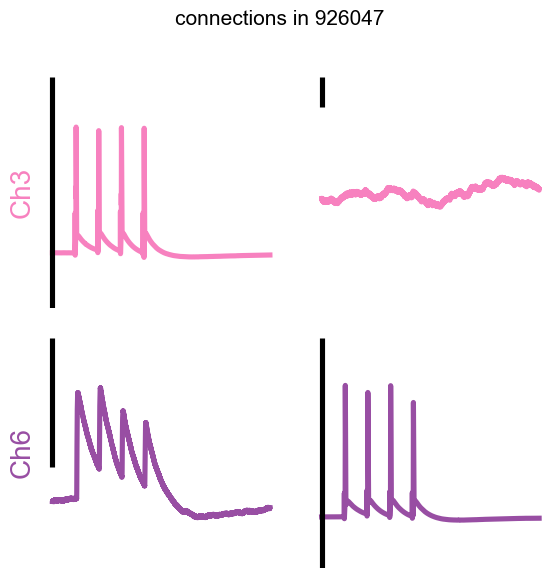

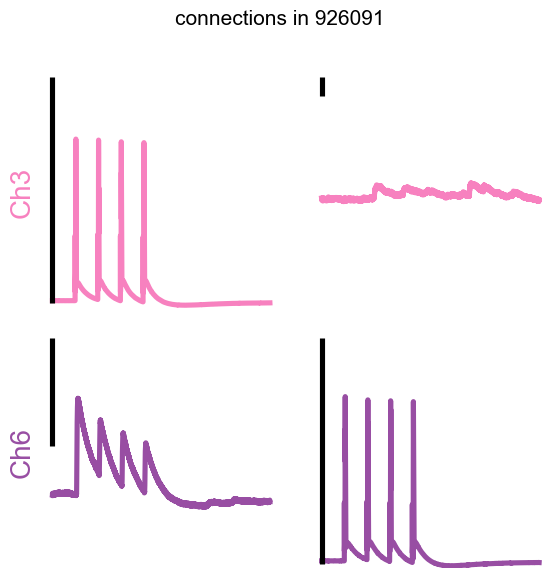

In [6]:
human_dir = '/Users/verjim/laptop_D_17.01.2022/Schmitz_lab/data/human/'
OP = 'OP240926'
patcher = 'Verji'

work_dir, filenames, indices_dict, slice_names, pre_chans, post_chans = sort.get_OP_metadata(human_dir, OP, patcher)


file_index = [46,90]

active_channels = [[3,6], [3, 6]]
y_labels_D2 = ['repatch \n Ch 1', 'repatch \n Ch 3', 
'repatch \n  Ch 5','repatch \n Ch6', 'repatch \n Ch 8']

inj=[-300,-200,-150,-100,-50,0,50,100,150,200,250,300,350,400,450,500,550,600,700,800,900,1000,1100,1200,1300,1400]

# clrs = ['#377eb8', '#ff7f00', '#4daf4a',
#         '#f781bf', '#984ea3','#999999', 
#         '#e41a1c', '#dede00']
# #match clrs for channels in 2 to be the same as repatched in 1
# clrs2 = ['#377eb8', '#ff7f00', '#4daf4a',
#         '#f781bf', '#984ea3']

clrs = ['#f781bf', '#984ea3']
#match clrs for channels in 2 to be the same as repatched in 1
clrs2 = ['#f781bf', '#984ea3']


fn = work_dir + filenames[46]
fn2 = work_dir + filenames[90]

z1 = 1.5
z2 = 40.5

stim_window_con_screen_man = {'Ch3': [48000,52000], 'Ch5': [88000,920000],'Ch8': [145_300,152_000]}
stim_window = stim_window_con_screen_man

con_screen_data = hcf.load_traces(fn)

x = len(active_channels[0]) 
stim_window = stim_window_con_screen

fig, ax = plt.subplots(x, x, sharex = True, sharey = False, figsize = (6,6))
for i, ch1 in enumerate(active_channels[0]):
    ch_name_i = 'Ch' + str(ch1)
    ch_data_i = con_screen_data[ch_name_i][0]
    avg = np.mean(ch_data_i, axis = 1)

    for j, ch2 in enumerate(active_channels[0]):
        # if i == j:
        #     ax[i,j].plot()
        ch_name_j = 'Ch' + str(ch2)
        plotwin = avg[stim_window[ch_name_j][0]:stim_window[ch_name_j][1]] #from the average takes the signal for this stim_window
        ax[i,j].plot(plotwin, clrs[i], lw = line_w) 
        ax[i,0].set_ylabel(str(ch_name_i))
        ax[i,j].yaxis.label.set_color(clrs[i])
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        ax[i,j].spines['top'].set_visible(False)
        ax[i,j].spines['right'].set_visible(False)
        ax[i,j].spines['bottom'].set_visible(False)
        ax[i,j].spines['left'].set_visible(False)
        if plotwin.max()-plotwin.min() < 10: 
            ax[i,j].set_ylim([plotwin.min() - z1, plotwin.max() + z1])
            v1 = ax[i,j].vlines(0,plotwin.min() + z1, plotwin.max() + z1, lw=line_w, color='k')
            print(str(ch1), str(ch2), 'amp = ',plotwin.min() - plotwin.max())
            #print(str(ch1), str(ch2), 'min ',plotwin.min())
        else:
            ax[i,j].set_ylim([plotwin.min() - z2, plotwin.max() + z2])
            v2 = ax[i,j].vlines(0,plotwin.min() - z2, plotwin.max() + z2, lw=line_w, color='k')
#             print(str(ch1), str(ch2), 'max ',plotwin.max())
#             print(str(ch1), str(ch2), 'min ',plotwin.min())
            print(str(ch1), str(ch2), 'amp = ',plotwin.min() - plotwin.max())

fig.suptitle('connections in ' + fn[-10:-4],fontsize=15)
fig.patch.set_facecolor('white')
fig.tight_layout()

# plt.savefig(save_dir + 'traces/' + 'connection_D1' + '.pdf')
# plt.close(fig)



con_screen_data2 = hcf.load_traces(fn2)

x = len(active_channels[1]) 

fig, ax = plt.subplots(x, x, sharex = True, sharey = False, figsize = (6,6))
for i, ch1 in enumerate(active_channels[1]):
    ch_name_i = 'Ch' + str(ch1)
    ch_data_i = con_screen_data2[ch_name_i][0]
    avg = np.mean(ch_data_i, axis = 1)

    for j, ch2 in enumerate(active_channels[1]):
        # if i == j:
        #     ax[i,j].plot()
        ch_name_j = 'Ch' + str(ch2)
        plotwin = avg[stim_window[ch_name_j][0]:stim_window[ch_name_j][1]] #from the average takes the signal for this stim_window
        ax[i,j].plot(plotwin, clrs[i], lw=line_w)
        ax[i,0].set_ylabel(str(ch_name_i))
        ax[i,j].yaxis.label.set_color(clrs[i])
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        ax[i,j].spines['top'].set_visible(False)
        ax[i,j].spines['right'].set_visible(False)
        ax[i,j].spines['bottom'].set_visible(False)
        ax[i,j].spines['left'].set_visible(False)
        if plotwin.max()-plotwin.min() < 10: 
            ax[i,j].set_ylim([plotwin.min() - z1, plotwin.max() + z1])
            v1 = ax[i,j].vlines(0,plotwin.min() + z1, plotwin.max() + z1, lw=line_w, color='k') 
        else:
            ax[i,j].set_ylim([plotwin.min() - z1, plotwin.max() + z2])
            v2 = ax[i,j].vlines(0,plotwin.min() + z1, plotwin.max() + z2, lw=line_w, color='k')

fig.suptitle('connections in ' + fn2[-10:-4],fontsize=15)
fig.patch.set_facecolor('white')
fig.tight_layout()

# plt.savefig(save_dir + 'traces/' + 'connection_D2' + '.pdf')
# plt.close(fig)


# Extra plots for info

Text(0, 0.5, 'log (ms)')

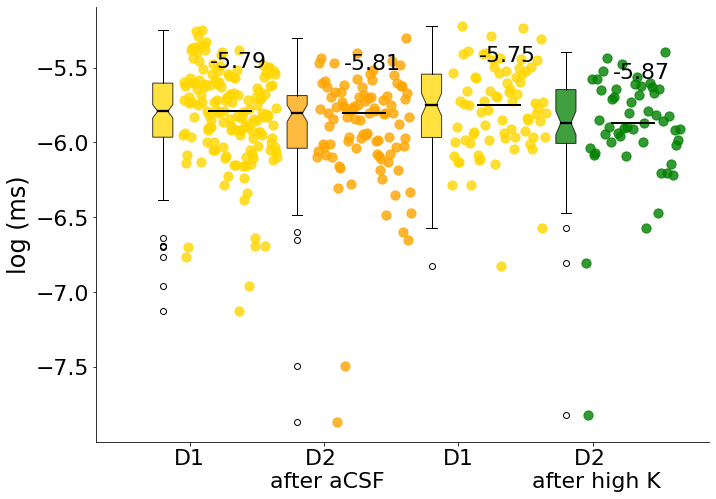

In [286]:
df = df_spontan_slice
df = df[df['amplitude mean'] > -90]

data_type = 'slice'

df.insert(len(df.columns), 'log_rise', np.log(df['risetime mean']))
df.insert(len(df.columns), 'log_decay', np.log(df['decaytime mean']))

param = 'log_decay'
u = 0


fig2 = plt.figure(figsize=(fig_x,fig_y))
ax = plt.subplot(1,1,1)
for i, tr in enumerate(treatments):
    for j, day in enumerate(df['day'].unique()):
        k = j + 2*i 
        df_plot = df[(df['treatment'] == tr) & (df['day'] == day)]
        median = df_plot[param].median()
        x = np.linspace(0.65+k, 1.35+k, len(df_plot))

        ax.boxplot(df_plot[param], positions = [k + 0.5], notch = True, patch_artist=True, boxprops=dict(facecolor=colors[k], alpha = 0.75),
        medianprops = dict(linewidth=2.3, color = 'k'))    
        ax.scatter(x, df_plot[param], c = colors[int(k)], s = scatter_dot_size, alpha = scatter_alpha)

        ax.scatter(1+k, median, color = 'k', marker = '_', s = 2000, zorder = 2)
        ax.text(0.85+k, (median + abs(.05*median)), str(round(median,2)), size = ticks_and_text_size)

#         ax.text(1 + 2*i, int(np.max(df[param])), tr, size = 17, c = colors[2*i+1])
#         ax.text(1.7 + 2*i, int(np.max(df[param])), 'n = ' + str(len(df_plot)), size = ticks_and_text_size, c = colors[2*i+1])

ax.tick_params(axis='y', labelsize=22)
ax.set_xticks(ticks = [0.7,1.7,2.7,3.7], labels = x_labels, size = ticks_and_text_size)

ax.set_ylabel('log (ms)', size = ticks_and_text_size +2)

#plt.title(titles_dict[param][0], fontsize = 19, x = 0.5, y = 1)
# ax.set_ylabel(titles_dict_spontan[param][1], size = ticks_and_text_size +2)
# ax.set_yticks(ticks = titles_dict_spontan[param][2])
# ax.tick_params(axis='y', labelsize = ticks_and_text_size)

# plt.subplots_adjust(hspace=0.35)
# fig2.patch.set_facecolor('white')
# fig2.tight_layout()

# date = str(datetime.date.today())
# plt.savefig(save_dir + 'spontan/' + data_type + '_' + date + '_' + param + '.pdf')
# plt.close(fig2)



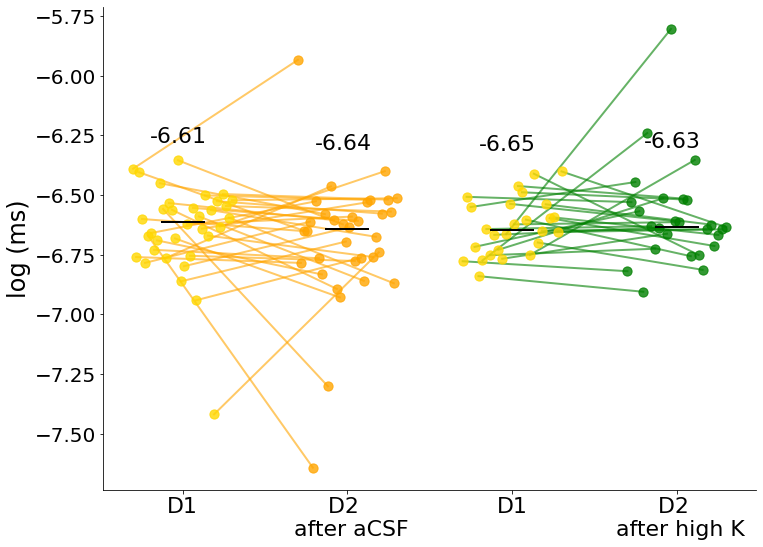

In [287]:
# repatch

df = df_spontan_repatch
#df = df[df['amplitude mean'] > -90]
df = df.sort_values(['day', 'cell_ID'])

df.insert(len(df.columns), 'log_rise', np.log(df['risetime mean']))
df.insert(len(df.columns), 'log_decay', np.log(df['decaytime mean']))

data_type = 'repatch'
param = 'log_rise'

fig2 = plt.figure(figsize=(fig_x,fig_y))
ax = plt.subplot(1,1,1)
for i, tr in enumerate(treatments):
    x_plot =[]

    for j, day in enumerate(df['day'].unique()):
        k = j + 2*i 
        df_plot = df[(df['treatment'] == tr) & (df['day'] == day)]
        df_plot.reset_index(drop=True, inplace=True)
        median = df_plot[param].median()
        x = np.linspace(0.7+k, 1.3+k, len(df_plot))
        x_plot.append(x)       
        ax.scatter(x, df_plot[param], c = colors[int(k)], s = scatter_dot_size, zorder = 2, alpha = scatter_alpha)
        ax.scatter(1+k, median, color = 'k', marker = '_', s = 2000, zorder = 2)
        ax.text(0.8+k, (median + abs(.05*median)), str(round(median,2)), size = ticks_and_text_size)
        x_plot.append(x)
        if k in [1,3]:
            for c, cell in enumerate(df_plot['cell_ID']):
                x1 = [x_plot[0][c], x[c]] 
                y = df[param][df['cell_ID'] == cell]
                plt.plot(x1, y, '-', color = colors[int(k)], alpha = 0.6, linewidth = 2, zorder = 1)

#             ax.text(1 + 2*i, int(np.max(df[param])), tr, size = 17, c = colors[2*i+1])
#             ax.text(1.7 + 2*i, int(np.max(df[param])), 'n = ' + str(len(df_plot)), size = 12, c = colors[2*i+1])

ax.set_xticks(ticks = [1,2,3,4], labels = x_labels , size = ticks_and_text_size)
#ax.set_ylabel(titles_dict_spontan[param][1], size = ticks_and_text_size +2)
# ax.set_yticks(ticks = titles_dict_spontan[param][2])
# ax.tick_params(axis='y', labelsize = ticks_and_text_size)

ax.set_ylabel('log (ms)', size = ticks_and_text_size +2)

#plt.title(titles_dict[param][0], fontsize = 19, x = 0.5, y = 1)

fig2.patch.set_facecolor('white')
fig2.tight_layout()

date = str(datetime.date.today())
# plt.savefig(save_dir + 'intr/' + data_type + '_' + date + '_' + param + '.pdf')
# plt.close(fig2)